In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
iris = sns.load_dataset("iris")

In [3]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
print(iris.head(80))


    sepal_length  sepal_width  petal_length  petal_width     species
0            5.1          3.5           1.4          0.2      setosa
1            4.9          3.0           1.4          0.2      setosa
2            4.7          3.2           1.3          0.2      setosa
3            4.6          3.1           1.5          0.2      setosa
4            5.0          3.6           1.4          0.2      setosa
..           ...          ...           ...          ...         ...
75           6.6          3.0           4.4          1.4  versicolor
76           6.8          2.8           4.8          1.4  versicolor
77           6.7          3.0           5.0          1.7  versicolor
78           6.0          2.9           4.5          1.5  versicolor
79           5.7          2.6           3.5          1.0  versicolor

[80 rows x 5 columns]


In [5]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [6]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
iris['species'].nunique()

3

In [8]:
#Checking for missing value
print("\n NULL VALUES IN EACH COLUMNS\n")
print(iris.isnull().sum())


 NULL VALUES IN EACH COLUMNS

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [9]:
# Checking dataset: balanced or imbalanced

print(iris['species'].value_counts(normalize=True)*100)

species
setosa        33.333333
versicolor    33.333333
virginica     33.333333
Name: proportion, dtype: float64


In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Storing numerical and categorical columns in different list

In [11]:

num_col = iris.select_dtypes(include=['int64', 'float64']).columns.to_list()

In [12]:
num_col

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

### Checking for outlier through kdeplot and outlier

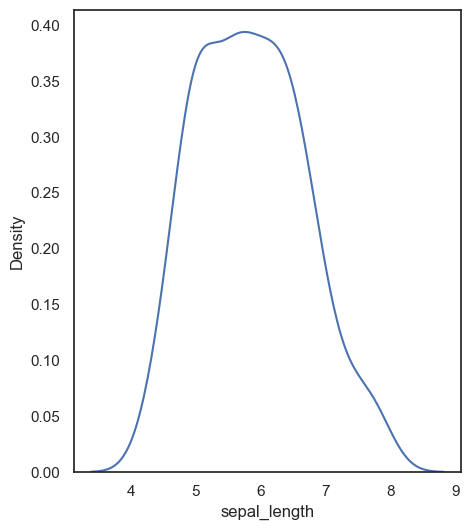

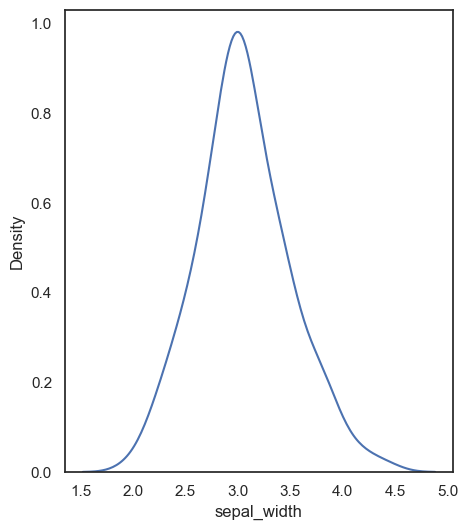

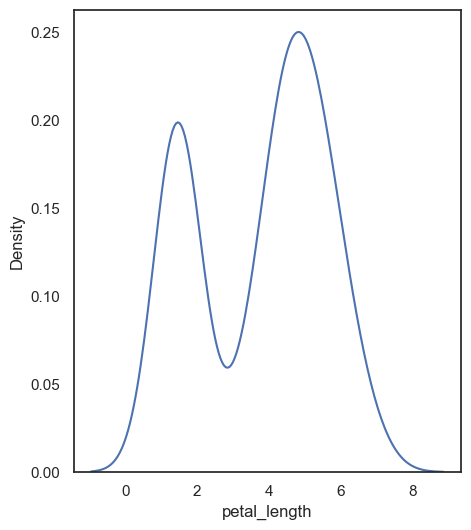

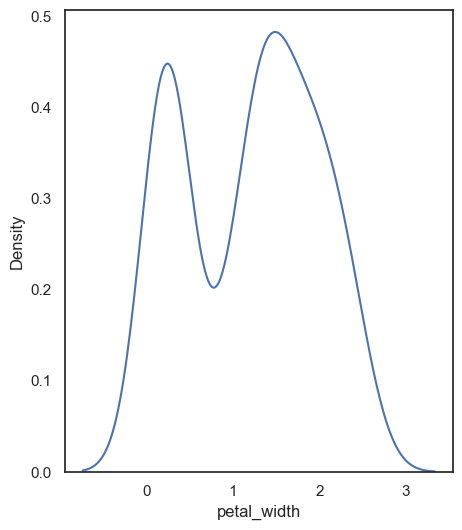

In [13]:

for col in num_col:
    plt.figure(figsize=(5,6))
    sns.kdeplot(iris[col])
    plt.show()

### Box plot for outlier checking

<Axes: >

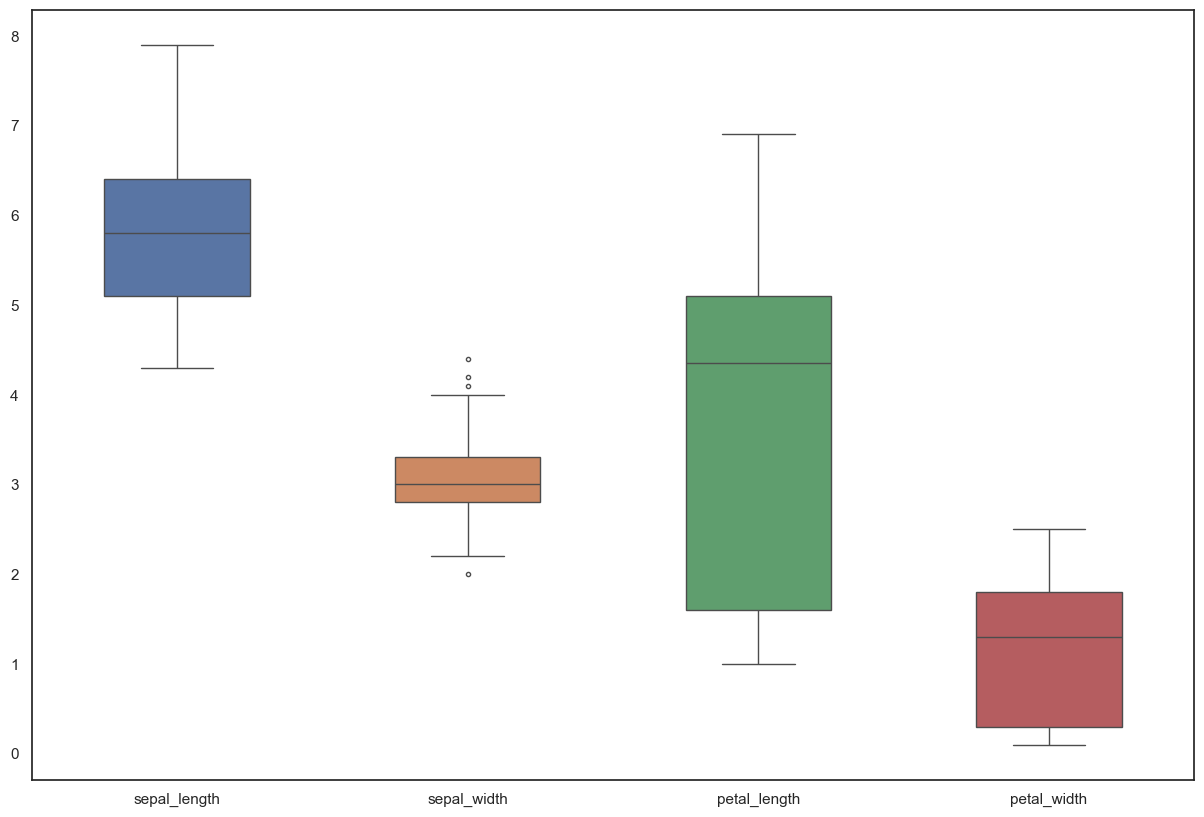

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=iris, width= 0.5,ax=ax,  fliersize=3)

### Converting categorical target column in numerical 


In [15]:
le = LabelEncoder()
iris['species']=le.fit_transform(iris['species'])

In [16]:
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [17]:
print(iris['species'].unique())

[0 1 2]


### Preparing inputs and output

In [18]:
X = iris.drop(['species'],axis=1)
y = iris['species']

### spliting in test and train dataset


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## Logistic Regression

#### training

In [20]:
lr= LogisticRegression()
lr.fit(X_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

#### Prediction

In [21]:

y_pred= lr.predict(X_test)

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


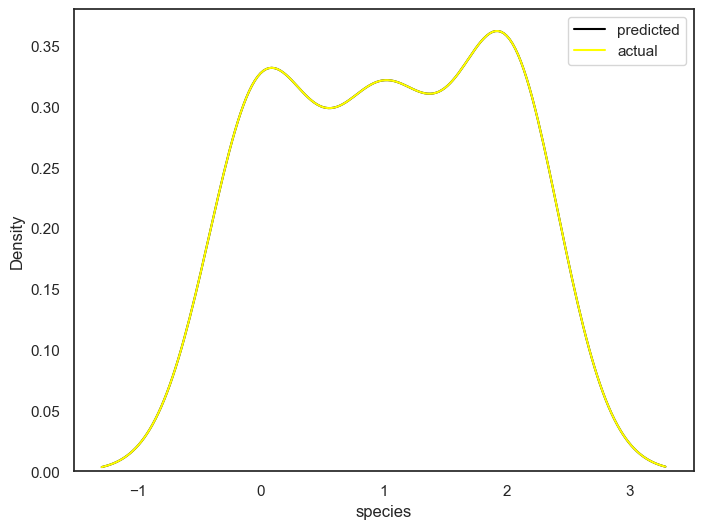

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
print(sns.kdeplot(y_pred,color='black',label='predicted',ax=ax))
print(sns.kdeplot(y_test,color='yellow',label='actual',ax=ax))
plt.legend()
plt.show()

#### Accuracy

In [23]:

print("Accuracy: ", accuracy_score(y_pred,y_test))
print("Classification_Report: ", classification_report(y_pred,y_test))
print("Confusion_Matrix",confusion_matrix(y_pred,y_test))

Accuracy:  1.0
Classification_Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion_Matrix [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [24]:
import joblib

### Creating model

In [25]:
joblib.dump(lr,"iris_model")

['iris_model']

### Prediction on New Data

In [26]:
new_data = pd.DataFrame({
    'sepal_length':4.6,
    'sepal_width':3.2,
    'petal_length':1.5,
    'petal_width':0.2,
     
},index=[0])

In [27]:
p = lr.predict(new_data)
if p[0]== 0:
    print("setosa")
elif p[0] == 1:
    print("versicolor")
else:
    print("virginica")

setosa


In [28]:
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
147,6.5,3.0,5.2,2.0,2
90,5.5,2.6,4.4,1.2,1
99,5.7,2.8,4.1,1.3,1
7,5.0,3.4,1.5,0.2,0
94,5.6,2.7,4.2,1.3,1
121,5.6,2.8,4.9,2.0,2
1,4.9,3.0,1.4,0.2,0
83,6.0,2.7,5.1,1.6,1
38,4.4,3.0,1.3,0.2,0
146,6.3,2.5,5.0,1.9,2
